In [163]:
import pandas as pd
import numpy as np
import random

In [164]:
all_data = pd.read_csv('stock_data.csv')
# all_data

Create a new dataframe using 20 randomly selected companies

In [165]:
unique_companies = all_data['Name'].unique()


selected_companies = random.sample(unique_companies.tolist(),20)

data = all_data[all_data['Name'].isin(selected_companies)]

data.tail

data.dtypes

Date              object
Code              object
Name              object
12m Low           object
12m High          object
Day Low           object
Day High          object
Day Price         object
Previous          object
Change            object
Change%           object
Volume            object
Adjusted Price    object
dtype: object

DO THE TYPE CONVERSIONS

In [166]:
#Convert to datetime
data.loc[:, 'Date'] = data['Date'].astype('datetime64[ns]')


# Convert to categorical
data.loc[:, 'Name'] = data['Name'].astype('category')
data.loc[:, 'Code'] = data['Code'].astype('category')

# Convert to float
columns_to_convert = ['12m Low', '12m High', 'Day Low', 'Day High', 'Day Price', 'Previous', 'Change', 'Change%', 'Adjusted Price', 'Volume']

for i in columns_to_convert:
    data.loc[:, i] = pd.to_numeric(data[i].astype(str).str.replace(',', ''), errors='coerce')


/tmp/ipykernel_5606/3346842627.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.loc[:, 'Date'] = data['Date'].astype('datetime64[ns]')


CHANGE COLUMN

In [167]:


#Calculate change for empty values
data.loc[:, 'Change'] = data['Day Price'].astype(float) - data['Previous'].astype(float)

#replace `-` in Change with null
data.loc[:, 'Change'] = data['Change'].replace('-', np.nan)

#Calculate Change% for empty values
data.loc[:, 'Change%'] = (data['Change'] / data['Previous']) * 100
data.head(5)
# data




,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,2022-01-03 00:00:00,EGAD,Eaagads Ltd,10.0,15.0,13.5,13.8,13.5,13.5,0.0,0.0,4000.0,NaN
9,2022-01-03 00:00:00,COOP,Co-operative Bank of Kenya Ltd,11.5,14.0,12.9,13.5,13.0,12.95,0.05,0.3861,100000.0,NaN
11,2022-01-03 00:00:00,EQTY,Equity Group Holdings Plc,39.0,55.0,51.0,54.5,52.75,52.75,0.0,0.0,4702000.0,NaN
12,2022-01-03 00:00:00,HFCK,HF Group Ltd,2.8,5.2,3.8,3.99,3.8,3.9,-0.1,-2.564103,10100.0,NaN
14,2022-01-03 00:00:00,KCB,KCB Group Plc,37.0,50.75,45.25,46.0,45.55,45.45,0.1,0.220022,174500.0,NaN


HANDLE ALL THE MISSING VALUES

In [168]:
null_counts = data.isnull().sum()
columns_with_null = null_counts[null_counts > 0]

# columns_with_null

REPLACING THE MISSING VALUES

In [169]:
# Find the indices of the columns you want to replace
volume_index = data.columns.get_loc('Volume')
adjusted_price_index = data.columns.get_loc('Adjusted Price')

# Create a list of column indices to replace
columns_to_replace_indices = [volume_index, adjusted_price_index]

# Select columns to replace using iloc
columns_to_replace = data.iloc[:, columns_to_replace_indices]

# Calculate means
columns_to_replace_means = columns_to_replace.mean()

# Replace NaN values with means
data.iloc[:, columns_to_replace_indices] = columns_to_replace.fillna(columns_to_replace_means)


In [170]:
data.head(30)

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,2022-01-03 00:00:00,EGAD,Eaagads Ltd,10.0,15.0,13.5,13.8,13.5,13.5,0.0,0.0,4000.0,NaN
9,2022-01-03 00:00:00,COOP,Co-operative Bank of Kenya Ltd,11.5,14.0,12.9,13.5,13.0,12.95,0.05,0.3861,100000.0,NaN
11,2022-01-03 00:00:00,EQTY,Equity Group Holdings Plc,39.0,55.0,51.0,54.5,52.75,52.75,0.0,0.0,4702000.0,NaN
12,2022-01-03 00:00:00,HFCK,HF Group Ltd,2.8,5.2,3.8,3.99,3.8,3.9,-0.1,-2.564103,10100.0,NaN
14,2022-01-03 00:00:00,KCB,KCB Group Plc,37.0,50.75,45.25,46.0,45.55,45.45,0.1,0.220022,174500.0,NaN
18,2022-01-03 00:00:00,SCBK,Standard Chartered Bank Kenya Ltd,123.0,148.75,130.0,131.0,130.0,128.25,1.75,1.364522,3300.0,NaN
19,2022-01-03 00:00:00,DCON,Deacons (East Africa) Plc,0.45,0.45,0.45,0.45,0.45,0.45,0.0,0.0,207746.220037,NaN
28,2022-01-03 00:00:00,SGL,Standard Group Plc,11.9,20.0,13.55,13.55,13.55,13.55,0.0,0.0,207746.220037,NaN
31,2022-01-03 00:00:00,SCAN,WPP ScanGroup Plc,3.5,6.36,4.1,4.19,4.1,4.14,-0.04,-0.966184,609200.0,NaN
44,2022-01-03 00:00:00,CIC,CIC Insurance Group Ltd,1.94,3.5,2.1,2.24,2.17,2.21,-0.04,-1.809955,31600.0,NaN


CLASSIFY INTO CLASSES

In [171]:
condition = data['Change'] > 0
# data['buy_or_sell'] = np.where(condition, 'Buy','Sell')

data.loc[data['Change'] > 0, 'high_or_low'] = 'high'
data.loc[data['Change'] <= 0, 'high_or_low'] = 'low'

# data.iloc[:, 'buy_or_sell'] = np.where(condition, 'Buy','Se;;')

data.head(20)





/tmp/ipykernel_5606/121080896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data['Change'] > 0, 'high_or_low'] = 'high'
/tmp/ipykernel_5606/121080896.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'high' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data['Change'] > 0, 'high_or_low'] = 'high'


,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,high_or_low
0,2022-01-03 00:00:00,EGAD,Eaagads Ltd,10.0,15.0,13.5,13.8,13.5,13.5,0.0,0.0,4000.0,NaN,low
9,2022-01-03 00:00:00,COOP,Co-operative Bank of Kenya Ltd,11.5,14.0,12.9,13.5,13.0,12.95,0.05,0.3861,100000.0,NaN,high
11,2022-01-03 00:00:00,EQTY,Equity Group Holdings Plc,39.0,55.0,51.0,54.5,52.75,52.75,0.0,0.0,4702000.0,NaN,low
12,2022-01-03 00:00:00,HFCK,HF Group Ltd,2.8,5.2,3.8,3.99,3.8,3.9,-0.1,-2.564103,10100.0,NaN,low
14,2022-01-03 00:00:00,KCB,KCB Group Plc,37.0,50.75,45.25,46.0,45.55,45.45,0.1,0.220022,174500.0,NaN,high
18,2022-01-03 00:00:00,SCBK,Standard Chartered Bank Kenya Ltd,123.0,148.75,130.0,131.0,130.0,128.25,1.75,1.364522,3300.0,NaN,high
19,2022-01-03 00:00:00,DCON,Deacons (East Africa) Plc,0.45,0.45,0.45,0.45,0.45,0.45,0.0,0.0,207746.220037,NaN,low
28,2022-01-03 00:00:00,SGL,Standard Group Plc,11.9,20.0,13.55,13.55,13.55,13.55,0.0,0.0,207746.220037,NaN,low
31,2022-01-03 00:00:00,SCAN,WPP ScanGroup Plc,3.5,6.36,4.1,4.19,4.1,4.14,-0.04,-0.966184,609200.0,NaN,low
44,2022-01-03 00:00:00,CIC,CIC Insurance Group Ltd,1.94,3.5,2.1,2.24,2.17,2.21,-0.04,-1.809955,31600.0,NaN,low


CLASSIFICATION FOR ALL THE 20 RANDOM COMPANIES CHOSEN

Accuracy: 0.9714285714285714
Precision: 0.9674556213017751
Recall: 0.990909090909091
Confusion Matrix:
[[149  11]
 [  3 327]]


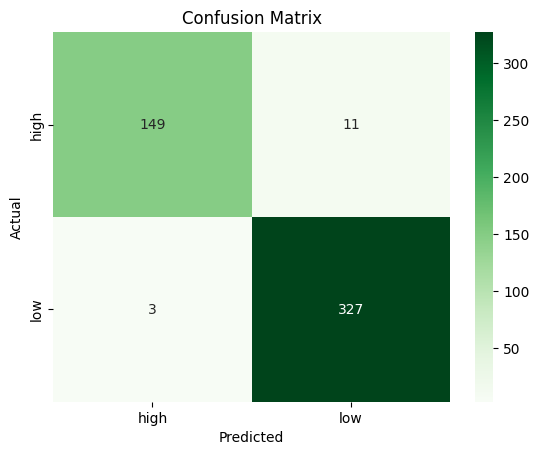

In [172]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,roc_curve,auc
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
data_copy = data.copy()

# Encode the 'buy_or_sell' column
le = LabelEncoder()
data_copy['high_or_low_encoded'] = le.fit_transform(data_copy['high_or_low'])

# Features
X = data_copy[['Day Price', 'Change', 'Change%']]

# Labels
y = data_copy['high_or_low_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=42)

# Ensure labels are one-dimensional arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')


print('Confusion Matrix:')
print(conf_matrix)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


ROC FOR 20 RANDOM COMPANIES

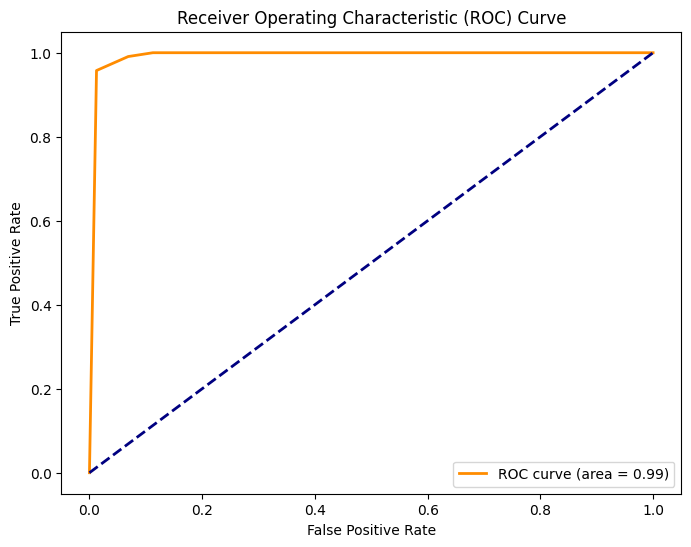

In [173]:
# Get decision scores
y_scores = knn_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

FOR PARTICULAR COMPANY

In [174]:
data

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,high_or_low
0,2022-01-03 00:00:00,EGAD,Eaagads Ltd,10.0,15.0,13.5,13.8,13.5,13.5,0.0,0.0,4000.0,NaN,low
9,2022-01-03 00:00:00,COOP,Co-operative Bank of Kenya Ltd,11.5,14.0,12.9,13.5,13.0,12.95,0.05,0.3861,100000.0,NaN,high
11,2022-01-03 00:00:00,EQTY,Equity Group Holdings Plc,39.0,55.0,51.0,54.5,52.75,52.75,0.0,0.0,4702000.0,NaN,low
12,2022-01-03 00:00:00,HFCK,HF Group Ltd,2.8,5.2,3.8,3.99,3.8,3.9,-0.1,-2.564103,10100.0,NaN,low
14,2022-01-03 00:00:00,KCB,KCB Group Plc,37.0,50.75,45.25,46.0,45.55,45.45,0.1,0.220022,174500.0,NaN,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6722,2022-05-31 00:00:00,BAT,British American Tobacco Kenya Plc,400.0,512.0,420.0,420.0,420.0,419.75,0.25,0.059559,2000.0,NaN,high
6725,2022-05-31 00:00:00,FTGH,Flame Tree Group Holdings Ltd,1.08,1.45,1.14,1.18,1.16,1.08,0.08,7.407407,149100.0,NaN,high
6726,2022-05-31 00:00:00,ORCH,Kenya Orchards Ltd,10.4,10.4,10.4,10.4,10.4,10.4,0.0,0.0,207746.220037,NaN,low
6728,2022-05-31 00:00:00,UNGA,Unga Group Ltd,26.1,36.4,29.0,29.0,29.0,30.0,-1.0,-3.333333,2100.0,NaN,low


In [178]:
chosen_company_code = 'UNGA'
chosen_company_data = data[data['Code'] == chosen_company_code]

chosen_company_data

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,high_or_low
62,2022-01-03 00:00:00,UNGA,Unga Group Ltd,26.1,36.4,27.65,27.65,27.65,27.65,0.0,0.0,207746.220037,NaN,low
128,2022-01-04 00:00:00,UNGA,Unga Group Ltd,26.1,36.4,27.65,27.65,27.65,27.65,0.0,0.0,207746.220037,NaN,low
194,2022-01-05 00:00:00,UNGA,Unga Group Ltd,26.1,36.4,27.65,27.65,27.65,27.65,0.0,0.0,207746.220037,NaN,low
260,2022-01-06 00:00:00,UNGA,Unga Group Ltd,26.1,36.4,27.65,27.65,27.65,27.65,0.0,0.0,207746.220037,NaN,low
326,2022-01-07 00:00:00,UNGA,Unga Group Ltd,26.1,36.4,27.65,27.65,27.65,27.65,0.0,0.0,207746.220037,NaN,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6464,2022-05-25 00:00:00,UNGA,Unga Group Ltd,26.1,36.4,30.0,30.0,30.0,30.0,0.0,0.0,3000.0,NaN,low
6530,2022-05-26 00:00:00,UNGA,Unga Group Ltd,26.1,36.4,30.0,30.0,30.0,30.0,0.0,0.0,207746.220037,NaN,low
6596,2022-05-27 00:00:00,UNGA,Unga Group Ltd,26.1,36.4,30.0,30.0,30.0,30.0,0.0,0.0,207746.220037,NaN,low
6662,2022-05-30 00:00:00,UNGA,Unga Group Ltd,26.1,36.4,30.0,30.0,30.0,30.0,0.0,0.0,207746.220037,NaN,low


In [179]:
num_rows, num_columns = chosen_company_data.shape

# Print the number of rows
print(f'Number of rows in chosen_company_data: {num_rows}')

Number of rows in chosen_company_data: 102


Accuracy: 0.967741935483871
Precision: 0.9615384615384616
Recall: 1.0
Confusion Matrix:
[[ 5  1]
 [ 0 25]]


/tmp/ipykernel_5606/2827886053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen_company_data.loc[:, 'high_or_low_encoded'] = le.fit_transform(chosen_company_data['high_or_low'])


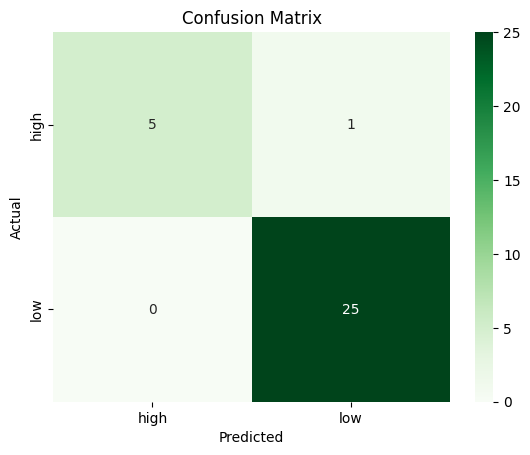

In [180]:


# Encode the 'buy_or_sell' column
le = LabelEncoder()
chosen_company_data.loc[:, 'high_or_low_encoded'] = le.fit_transform(chosen_company_data['high_or_low'])

# Features
X = chosen_company_data.loc[:, ['Day Price', 'Change', 'Change%']]

# Labels
y = chosen_company_data['high_or_low_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print(f'Precision: {precision}')
print(f'Recall: {recall}')


print('Confusion Matrix:')
print(conf_matrix)



# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


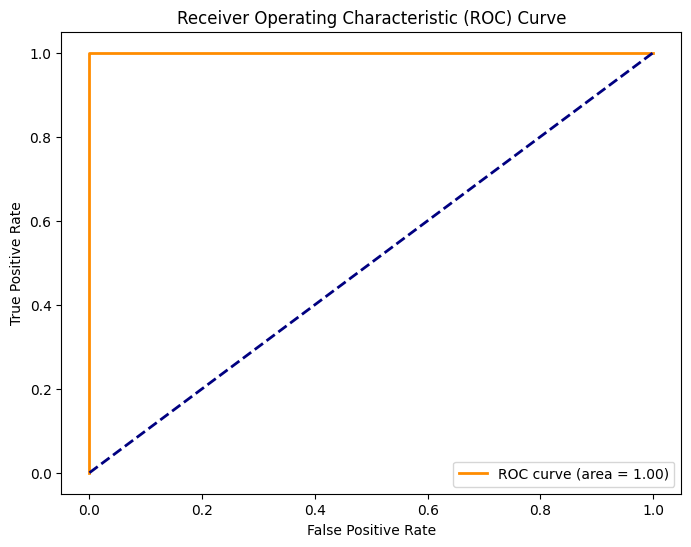

In [181]:
# Get decision scores
y_scores = knn_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
